In [8]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import pandas as pd
import numpy as np

import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FlipFlopGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner
from mlrose_hiive import GeomDecay, ArithDecay, ExpDecay

In [46]:
problem_name = "Flip Flop"


## Randomized Hill Climbing

In [48]:
rhc = RHCRunner(problem=FlipFlopGenerator().generate(seed=27, size=100),
              experiment_name='rhc_ff',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              restart_list=[0,2,8])

# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

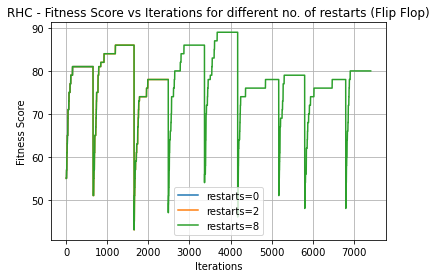

In [92]:
fig, axes = plt.subplots()


plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==0]["Fitness"].values, label="restarts=0")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==2]["Fitness"].values, label="restarts=2")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==8]["Fitness"].values, label="restarts=8")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("RHC - Fitness Score vs Iterations for different no. of restarts ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## Simulated Annealing

In [50]:
sa = SARunner(problem=FlipFlopGenerator().generate(seed=27, size=100),
              experiment_name='sa_ff',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              temperature_list=[0.01, 0.1, 1, 10],
              )

# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

In [51]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000455,55.0,0.0,0.01,1000
1,1,0.005358,55.0,2.0,0.01,1000
2,2,0.005581,55.0,3.0,0.01,1000
3,3,0.005798,55.0,4.0,0.01,1000
4,4,0.006208,55.0,6.0,0.01,1000
...,...,...,...,...,...,...
3999,996,0.472757,94.0,1391.0,10,1000
4000,997,0.473398,94.0,1392.0,10,1000
4001,998,0.474043,94.0,1393.0,10,1000
4002,999,0.474687,94.0,1395.0,10,1000


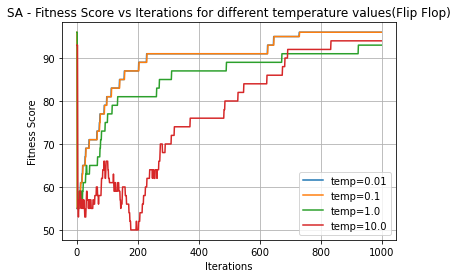

In [91]:
fig, axes = plt.subplots()


plt.plot(sa_run_curves["Fitness"][:1000].values, label="temp=0.01")
plt.plot(sa_run_curves["Fitness"][1000:2000].values, label="temp=0.1")
plt.plot(sa_run_curves["Fitness"][2000:3000].values, label="temp=1.0")
plt.plot(sa_run_curves["Fitness"][3000:4000].values, label="temp=10.0")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("SA - Fitness Score vs Iterations for different temperature values({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## Genetic Algorithm

In [53]:
ga = GARunner(problem=FlipFlopGenerator().generate(seed=27, size=100),
              experiment_name='ga_ff',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[5**i for i in range(1,4)],
              mutation_rates=[0.1*i for i in range(1,10,3)]
              )

# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

In [35]:
ga_run_stats.sort_values(by="Fitness")

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
0,0,55.0,0,0.000705,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",5,0.1,1000
14,0,55.0,0,0.000713,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",125,0.4,1000
12,0,55.0,0,0.000682,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",125,0.1,1000
10,0,55.0,0,0.000557,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",25,0.7,1000
16,0,55.0,0,0.000745,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",125,0.7,1000
6,0,55.0,0,0.000497,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",25,0.1,1000
8,0,55.0,0,0.000537,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",25,0.4,1000
4,0,55.0,0,0.000449,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",5,0.7,1000
2,0,55.0,0,0.000451,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",5,0.4,1000
3,1000,82.0,915,0.549918,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...",5,0.4,1000


In [36]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000705,55.0,0.0,5,0.1,1000
1,1,0.007342,55.0,1.0,5,0.1,1000
2,2,0.008264,57.0,3.0,5,0.1,1000
3,3,0.008903,57.0,4.0,5,0.1,1000
4,4,0.009489,57.0,5.0,5,0.1,1000
...,...,...,...,...,...,...,...
7768,710,0.430445,93.0,729.0,125,0.7,1000
7769,711,0.431132,93.0,730.0,125,0.7,1000
7770,712,0.431815,93.0,731.0,125,0.7,1000
7771,713,0.432501,93.0,732.0,125,0.7,1000


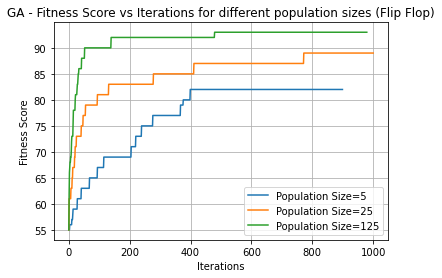

In [90]:
fig, axes = plt.subplots()


plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==5) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=5")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==25) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=25")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Population Size=125")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("GA - Fitness Score vs Iterations for different population sizes ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

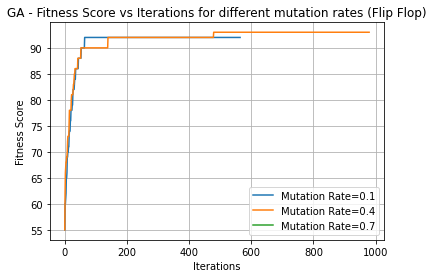

In [89]:
fig, axes = plt.subplots()


plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.1)]["Fitness"].values, label="Mutation Rate=0.1")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="Mutation Rate=0.4")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.7)]["Fitness"].values, label="Mutation Rate=0.7")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("GA - Fitness Score vs Iterations for different mutation rates ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## MIMIC

In [23]:
mimic = MIMICRunner(problem=FlipFlopGenerator().generate(seed=2, size=100),
              experiment_name='mimic_ff',
              output_directory="results", # note: specify an output directory to have results mimicved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[5, 10, 50],
              keep_percent_list=[0.1, 0.3, 0.5],
              use_fast_mimic=True
              )

# the two data frames will contain the results
mimic_run_stats, mimic_run_curves = mimic.run()

In [68]:
mimic_run_stats

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,55.0,0,0.000695,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,5,0.1,1000
1,1000,55.0,500,7.749555,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,5,0.1,1000
2,0,55.0,0,0.000490,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,5,0.3,1000
3,1000,65.0,510,7.790283,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",True,5,0.3,1000
4,0,55.0,0,0.000492,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,5,0.5,1000
5,1000,59.0,504,7.716448,"[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",True,5,0.5,1000
6,0,55.0,0,0.000486,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,10,0.1,1000
7,1000,55.0,500,8.027633,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,10,0.1,1000
8,0,55.0,0,0.000501,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,10,0.3,1000
9,1000,55.0,500,7.990944,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",True,10,0.3,1000


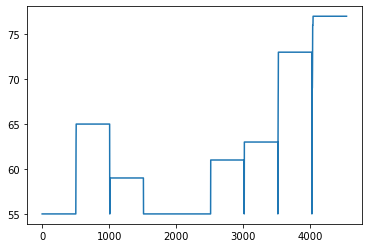

In [24]:
plt.plot(mimic_run_curves["Fitness"])

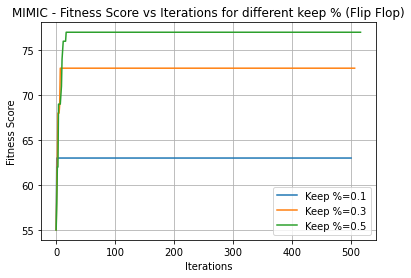

In [88]:
fig, axes = plt.subplots()


plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.1)]["Fitness"].values, label="Keep %=0.1")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.3)]["Fitness"].values, label="Keep %=0.3")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Keep %=0.5")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("MIMIC - Fitness Score vs Iterations for different keep % ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

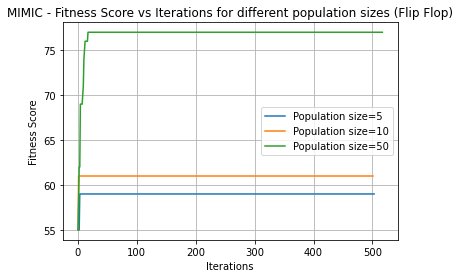

In [87]:
fig, axes = plt.subplots()


plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==5) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=5")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==10) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=10")
plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="Population size=50")
axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("MIMIC - Fitness Score vs Iterations for different population sizes ({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

## Comparing Algorithms

In [111]:
rhc_run_stats["algo"] = "rhc"
sa_run_stats["algo"] = "sa"
ga_run_stats["algo"] = "ga"
mimic_run_stats["algo"] = "mimic"

df = rhc_run_stats.append(sa_run_stats.append(ga_run_stats.append(mimic_run_stats))).dropna(axis=1)
df = df[df["Iteration"]!=0]
df

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,81.0,663,0.254344,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...",1000,rhc
3,1000,81.0,663,0.231491,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...",1000,rhc
5,1000,86.0,1682,0.957187,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",1000,rhc
7,1000,78.0,2533,1.904357,"[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",1000,rhc
9,1000,81.0,663,0.248793,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...",1000,rhc
11,1000,86.0,1682,1.030263,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",1000,rhc
13,1000,78.0,2533,2.012016,"[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",1000,rhc
15,1000,86.0,3435,3.389395,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",1000,rhc
17,1000,89.0,4263,4.967198,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, ...",1000,rhc
19,1000,78.0,5279,7.354125,"[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",1000,rhc


### Fitness Score vs Iterations

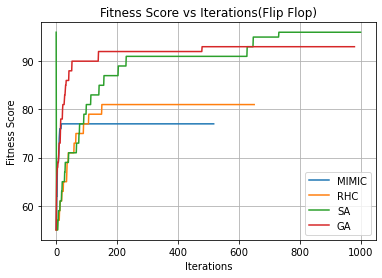

In [86]:
fig, axes = plt.subplots()

plt.plot(mimic_run_curves[(mimic_run_curves["Population Size"]==50) & (mimic_run_curves["Keep Percent"]==0.5)]["Fitness"].values, label="MIMIC")
plt.plot(rhc_run_curves[rhc_run_curves["Restarts"]==0]["Fitness"].values, label="RHC")
plt.plot(sa_run_curves["Fitness"][1000:2000].values, label="SA")
plt.plot(ga_run_curves[(ga_run_curves["Population Size"]==125) & (ga_run_curves["Mutation Rate"]==0.4)]["Fitness"].values, label="GA")

axes.set_xlabel("Iterations")
axes.set_ylabel("Fitness Score")
axes.set_title("Fitness Score vs Iterations({})".format(problem_name))
axes.legend(loc="best")
axes.grid()

In [114]:
df.groupby("algo").max("Fitness")["Fitness"]

algo
ga       93.0
mimic    77.0
rhc      89.0
sa       96.0
Name: Fitness, dtype: float64

### Wall Clock Time

In [118]:
df.groupby("algo").sum("Time")["Time"]

algo
ga       18.223431
mimic    87.945446
rhc      57.627235
sa        1.977795
Name: Time, dtype: float64

### Time per iteration

In [119]:
df.groupby("algo").mean("Time")["Time"]

algo
ga       2.024826
mimic    9.771716
rhc      4.432864
sa       0.494449
Name: Time, dtype: float64

### Iterations taken to converge

In [132]:
df.groupby("algo").max("Fitness")

,Iteration,Fitness,FEvals,Time,max_iters
algo,,,,,
ga,1000,93.0,1017,5.424740,1000
mimic,1000,77.0,526,14.953886,1000
rhc,1000,89.0,7566,14.133724,1000
sa,1000,96.0,1396,0.526793,1000


### Fitness vs Size of Problem

In [5]:
df_size = pd.DataFrame()

for size in [5, 25, 125]:
    problem=FlipFlopGenerator().generate(seed=27, size=size)
    
    rhc = RHCRunner(
              problem=problem,
              experiment_name='rhc_ff_size',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              restart_list=[0]
        )


    rhc_run_stats, rhc_run_curves = rhc.run()
    
    sa = SARunner(problem=problem,
              experiment_name='sa_ff_size',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              temperature_list=[0.1],
              )

    # the two data frames will contain the results
    sa_run_stats, sa_run_curves = sa.run()
    
    ga = GARunner(problem=problem,
              experiment_name='ga_ff_size',
              output_directory="results", # note: specify an output directory to have results saved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[125],
              mutation_rates=[0.4]
              )

    # the two data frames will contain the results
    ga_run_stats, ga_run_curves = ga.run()
    
    mimic = MIMICRunner(problem=problem,
              experiment_name='mimic_ff_size',
              output_directory="results", # note: specify an output directory to have results mimicved to disk
              seed=27,
              iteration_list=[1000],
              population_sizes=[50],
              keep_percent_list=[0.5],
              use_fast_mimic=True
              )

    # the two data frames will contain the results
    mimic_run_stats, mimic_run_curves = mimic.run()
    
    rhc_run_stats["algo"] = "rhc"
    sa_run_stats["algo"] = "sa"
    ga_run_stats["algo"] = "ga"
    mimic_run_stats["algo"] = "mimic"

    df_size = df_size.append(rhc_run_stats.append(sa_run_stats.append(ga_run_stats.append(mimic_run_stats)))).dropna(axis=1)
    df_size = df_size[df_size["Iteration"]!=0]

In [6]:
df_size

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,3.0,500,0.095902,"[1, 0, 0, 1, 0]",1000,rhc
1,1000,4.0,14,0.003869,"[0, 1, 0, 1, 0]",1000,sa
1,1000,4.0,2,0.007961,"[0.0, 1.0, 0.0, 1.0, 0.0]",1000,ga
1,1000,4.0,2,0.005231,"[0.0, 1.0, 0.0, 1.0, 0.0]",1000,mimic
1,1000,20.0,540,0.100062,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...",1000,rhc
1,1000,23.0,1162,0.298990,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",1000,sa
1,1000,23.0,515,2.349548,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",1000,ga
1,1000,21.0,510,2.540012,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",1000,mimic
1,1000,103.0,832,0.356421,"[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...",1000,rhc
1,1000,115.0,1220,0.531245,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",1000,sa


In [17]:
df_small = df_size[:4]
df_medium = df_size[4:8]
df_big = df_size[8:]

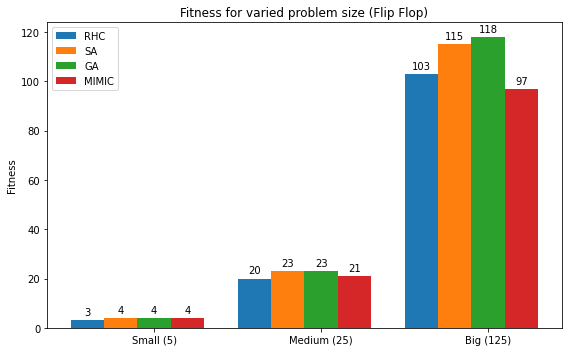

In [72]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(3)

width = 0.2  # the width of the bars
rhc = ax.bar(x - 0.4, df_size[df_size.algo=="rhc"]["Fitness"], width, label='RHC')
sa = ax.bar(x - width, df_size[df_size.algo=="sa"]["Fitness"], width, label='SA')
ga = ax.bar(x, df_size[df_size.algo=="ga"]["Fitness"], width, label='GA')
mimic = ax.bar(x + width, df_size[df_size.algo=="mimic"]["Fitness"], width, label='MIMIC')


# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness')
ax.set_title('Fitness for varied problem size ({})'.format(problem_name))
ax.set_xticks(x)
ax.set_xticklabels(["Small (5)", "Medium (25)", "Big (125)"])
ax.legend()

ax.bar_label(rhc, padding=3)
ax.bar_label(sa, padding=3)
ax.bar_label(ga, padding=3)
ax.bar_label(mimic, padding=3)

fig.tight_layout()

plt.show()

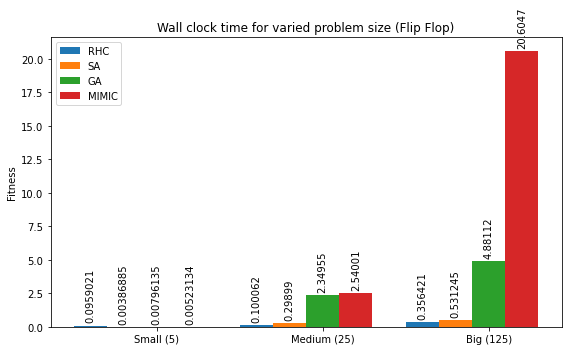

In [75]:
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(3)

width = 0.2  # the width of the bars
rhc = ax.bar(x - 0.4, df_size[df_size.algo=="rhc"]["Time"], width, label='RHC')
sa = ax.bar(x - width, df_size[df_size.algo=="sa"]["Time"], width, label='SA')
ga = ax.bar(x, df_size[df_size.algo=="ga"]["Time"], width, label='GA')
mimic = ax.bar(x + width, df_size[df_size.algo=="mimic"]["Time"], width, label='MIMIC')


# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fitness')
ax.set_title('Wall clock time for varied problem size ({})'.format(problem_name))
ax.set_xticks(x)
ax.set_xticklabels(["Small (5)", "Medium (25)", "Big (125)"])
ax.legend()

ax.bar_label(rhc, padding=3, rotation=90)
ax.bar_label(sa, padding=3, rotation=90)
ax.bar_label(ga, padding=3, rotation=90)
ax.bar_label(mimic, padding=3, rotation=90)

fig.tight_layout()

plt.show()